In [ ]:
import scipy.stats as sts
import sympy as sp
import scipy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import math

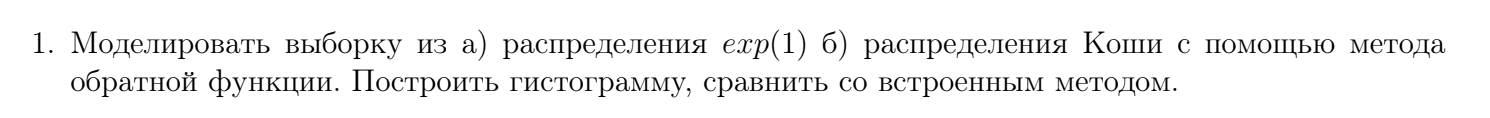

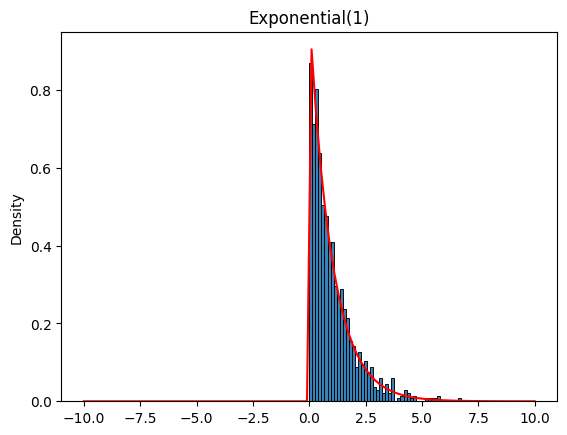

<function matplotlib.pyplot.show(close=None, block=None)>

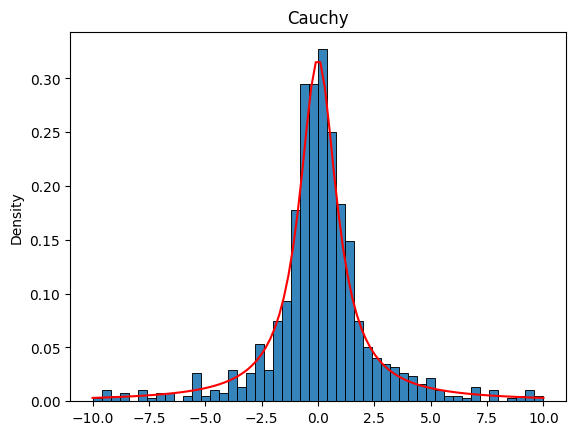

In [ ]:
def apply_inv_exp(q: float):
    return sts.expon.ppf(q, scale = 1)
def apply_inv_cauchy(q: float):
    return sts.cauchy.ppf(q, loc = 0, scale = 1)
UniformSample = np.random.uniform(low=0.0, high=1.0, size=1000)
ResExp = np.array([apply_inv_exp(q) for q in UniformSample])
fig1,ax1 = plt.subplots()
plt.title('Exponential(1)')
ax1 = sns.histplot(ResExp, bins = 50, kde = False, stat='density', alpha = 0.9)
x = np.linspace(-10,10,100)
ax1.plot(x, sts.expon.pdf(x), color='r')
plt.show()


ResCauchy = np.array([apply_inv_cauchy(q) for q in UniformSample])
fig2, ax2 = plt.subplots()
plt.title('Cauchy')
ax2 = sns.histplot(ResCauchy, bins = 50, binrange = (-10,10), kde = False, stat='density', alpha = 0.9)
ax2.plot(x, sts.cauchy.pdf(x), color='red')
plt.show

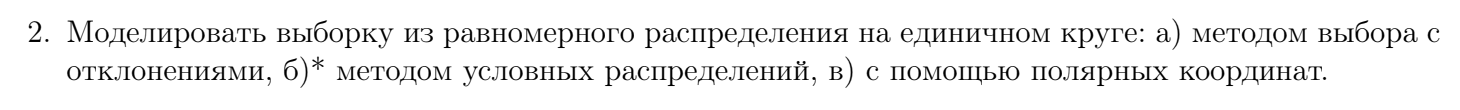

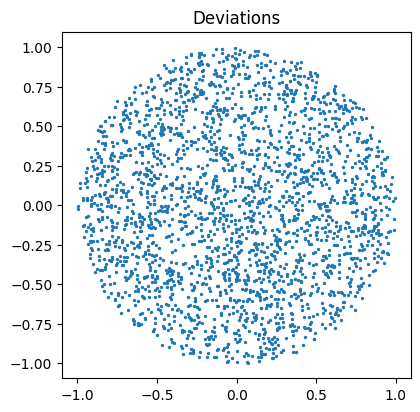

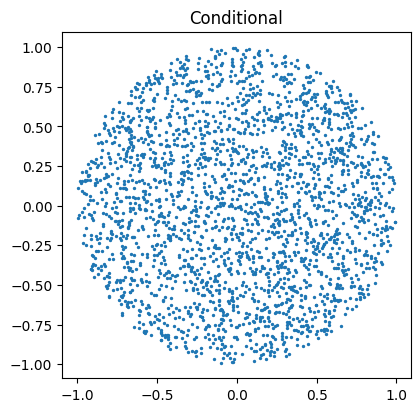

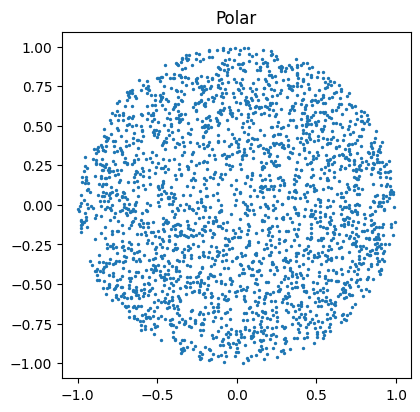

In [ ]:
def UniCircleDeviations(sample_size:int):
    x_res = []
    y_res = []
    size = 0
    while (size<sample_size): #here the constant C is 1/pi
        x_axe = np.random.uniform(-1,1, size=1)
        y_axe = np.random.uniform(-1,1, size=1)
        p = (x_axe)**2 + (y_axe)**2
        if p <= 1:
            x_res = np.append(x_res, x_axe)
            y_res = np.append(y_res, y_axe)
            size+=1
        else:
            continue
    result_array = np.array([x_res, y_res])
    return result_array
a = UniCircleDeviations(2500)
plt.figure(figsize=(4.5,4.5))
plt.title("Deviations")
plt.scatter(a[0], a[1], s=2)
################################################################### ИСПРАВЛЕНО
def UniCircleConditional(sample_size:int):
    x_res = sts.semicircular.rvs(size = sample_size)
    y_res = []
    for i in range (sample_size):
        border = np.sqrt(1-(x_res[i])**2)
        rv = np.random.uniform(-border, border, size = 1)
        y_res = np.append(y_res, rv)
    result_array = np.array([x_res, y_res])
    return result_array
a = UniCircleConditional(2500)
plt.figure(figsize=(4.5,4.5))
plt.title("Conditional")
plt.scatter(a[0], a[1], s = 2)
##################################################################
def UniCirclePolar(sample_size:int):
    r_res = np.random.uniform(0,1, size = sample_size)
    phi_res = np.random.uniform(0, 2*np.pi, size = sample_size)
    result_array = np.array([r_res, phi_res])
    return result_array
a = UniCirclePolar(2500)
plt.figure(figsize=(4.5,4.5))
plt.title("Polar")
plt.scatter(np.sqrt(a[0])*np.cos(a[1]), np.sqrt(a[0])*np.sin(a[1]), s=2)

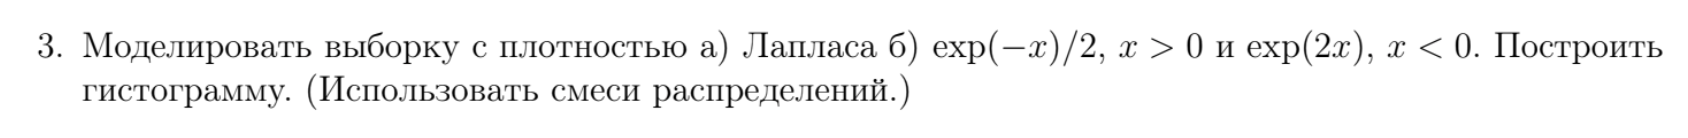

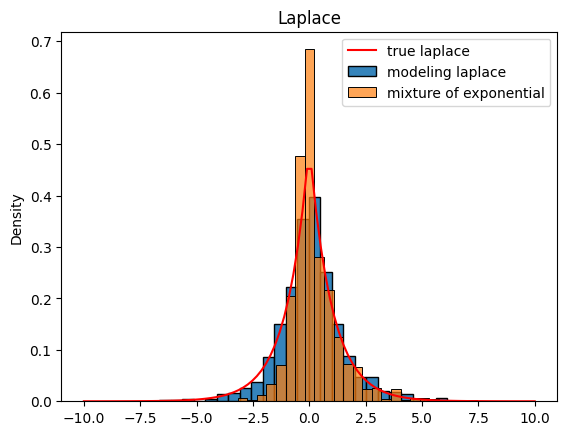

In [ ]:
x = np.linspace(-10,10,100)
def apply_inv_laplace(q: float):
    return sts.laplace.ppf(q, scale = 1)
def generate_laplace(sample_size):
    UniformSample = np.random.uniform(0,1, size=sample_size)
    ResLaplace = np.array([apply_inv_laplace(q) for q in UniformSample])
    return ResLaplace
def generate_expb(sample_size): #ИСПРАВЛЕНО
    sample_bern = np.random.binomial(1,1/2,sample_size)
    sample_expon = []
    for i in range(sample_size):
        if sample_bern[i]==1:
            sample_expon = np.append(sample_expon, np.random.exponential(scale=1.0))
        else:
            sample_expon = np.append(sample_expon, -np.random.exponential(scale=1/2))
    return sample_expon
fig1,ax1 = plt.subplots()
plt.title('Laplace')
ax1 = sns.histplot(generate_laplace(1000), bins = 25,kde = False, stat='density', alpha = 0.9, label = 'modeling laplace')
ax1.plot(x, sts.laplace.pdf(x), color = 'red', label = 'true laplace')
ax2 = sns.histplot(generate_expb(1000), bins = 25, kde = False, stat='density', alpha = 0.7, label = 'mixture of exponential')
plt.legend()
plt.show()

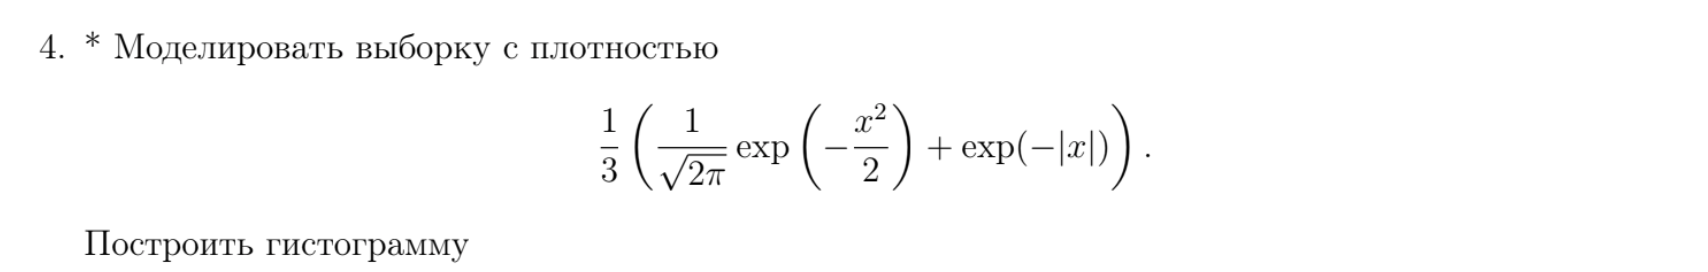

<function matplotlib.pyplot.show(close=None, block=None)>

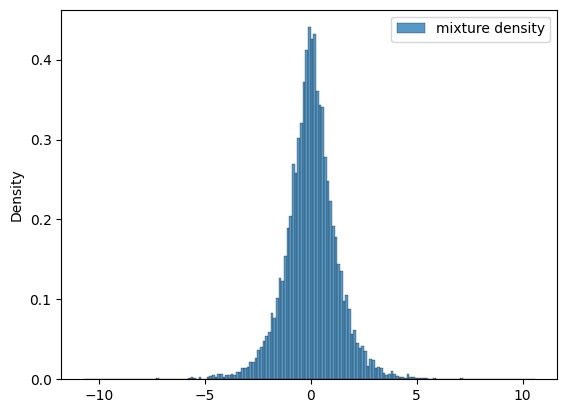

In [ ]:
def generate_mixture(sample_size:int):
    sample_bern = np.random.binomial(1,2/3,sample_size)
    sample_mixture = []
    for i in range(sample_size):
        if sample_bern[i]==1:
            sample_mixture = np.append(sample_mixture, np.random.laplace())
        else:
            sample_mixture = np.append(sample_mixture, np.random.normal())
    return sample_mixture
ax = sns.histplot(generate_mixture(10000), kde = False, stat='density', label="mixture density")
plt.legend()
plt.show

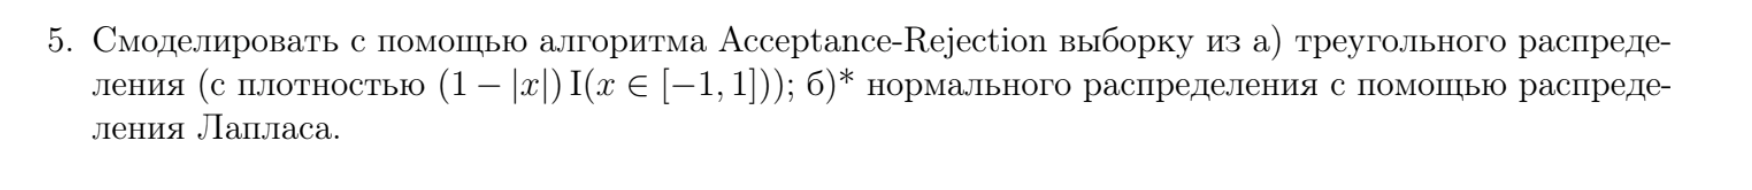

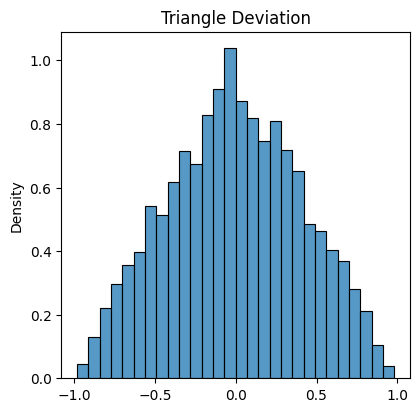

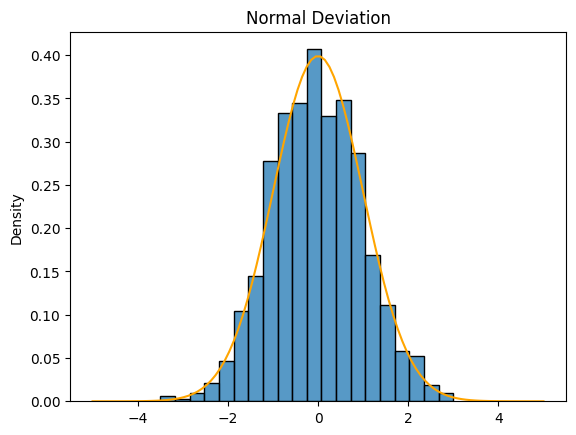

In [ ]:
def UniTriangleDeviations(sample_size:int): #ИСПРАВЛЕНО
    x_res = []
    y_res = []
    size = 0 ### константа под этот метод здесь равна 2
    while (size<sample_size):
        x_axe = np.random.uniform(-1,1, size=1)
        p = 1 - np.absolute(x_axe)
        y = sts.bernoulli(p).rvs(size=1)
        if y == 1:
            x_res = np.append(x_res, x_axe)
            size+=1
        else:
            continue
    result_array = np.array(x_res)
    return result_array
a = UniTriangleDeviations(5000)
plt.figure(figsize=(4.5,4.5))
plt.title("Triangle Deviation")
sns.histplot(a, stat = 'density')
############################################
def NormalDeviations(sample_size:int):
    y_res = []
    Const = np.sqrt(2*np.e/np.pi)
    size = 0
    while (size<sample_size):
        y_axe = sts.laplace.rvs(size=1)
        p = sts.norm.pdf(y_axe)/(Const*sts.laplace.pdf(y_axe))
        flag = np.random.binomial(1,p=p,size=1)
        if flag == 1:
            y_res = np.append(y_res, y_axe)
            size+=1
        else:
            continue
    result_array = np.array(y_res)
    return result_array
a = NormalDeviations(1000)
x = np.linspace(-5,5,100)
plt.figure()
plt.title("Normal Deviation")
sns.histplot(a, bins = 20, stat = 'density')
plt.plot(x, sts.norm.pdf(x, loc = 0, scale = 1), color = 'orange')